In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random

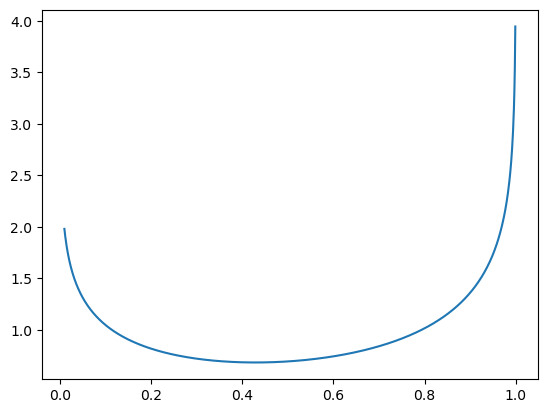

In [2]:
a1 = np.array([1, 0])
a2 = np.array([0, 1])

f1 = random.random()
f2 = 1- f1

mycvxfun = lambda p : -( f1*np.log(a1.T@np.array([p, 1-p])) + f2*np.log(a2.T@np.array([p, 1-p])) )

p = np.arange(0.01,1,1e-3)
plt.plot(p, mycvxfun(p))

Text(0.5, 0.5, 'u2')

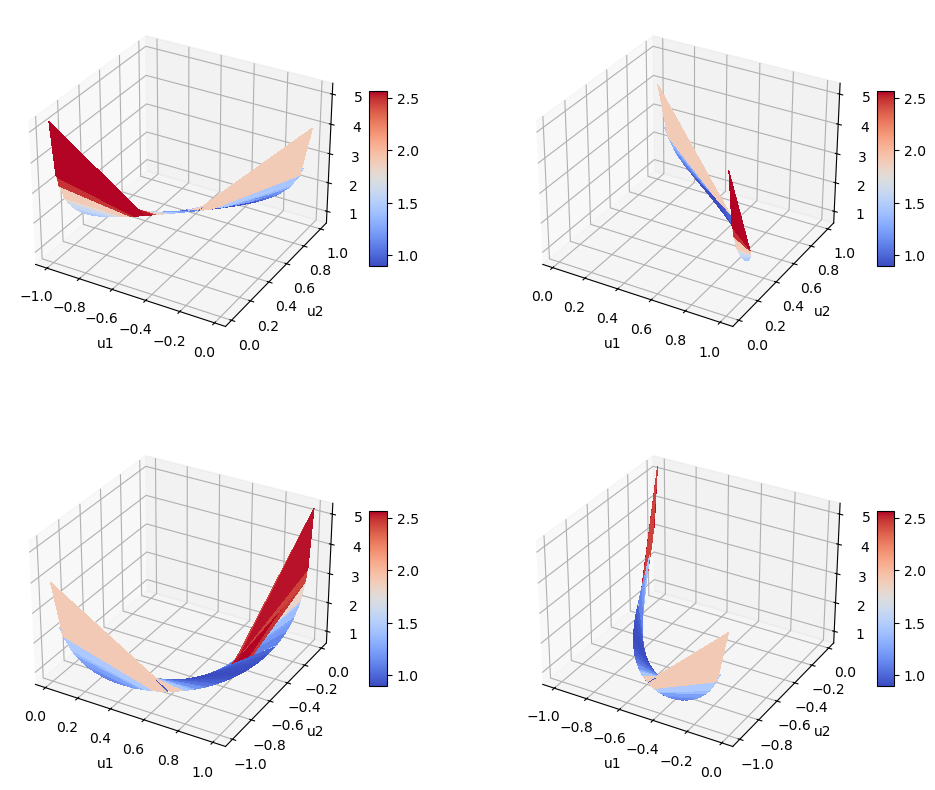

In [3]:
myfun = lambda x1, x2 : -( f1*np.log(x1) + f2*np.log(x2) )


theta = np.arange(0.01, 2*np.pi,2*np.pi/100 )
theta = theta.reshape(10,10)
u1_sq = np.sin(theta)**2
u2_sq = np.cos(theta)**2


u1 = np.sqrt(u1_sq)
u2 = np.sqrt(u2_sq)

Z = myfun(u1_sq, u2_sq)

fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(2,2 , 1, projection='3d')
surf = ax.plot_surface(-u1, u2, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('u1')
ax.set_ylabel('u2')

ax = fig.add_subplot(2,2 , 2, projection='3d')
surf = ax.plot_surface(u1, u2, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('u1')
ax.set_ylabel('u2')

ax = fig.add_subplot(2,2 , 3, projection='3d')
surf = ax.plot_surface(u1, -u2, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('u1')
ax.set_ylabel('u2')


ax = fig.add_subplot(2,2 , 4, projection='3d')
surf = ax.plot_surface(-u1, -u2, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel('u1')
ax.set_ylabel('u2')


In [25]:
import cvxpy as cp

f1 = random.random()
f2 = 1- f1
# Example CVXPY variable and problem
x = cp.Variable(2)
objective = cp.Minimize(-f1*cp.log(a1.T@cp.multiply(x,x)) - f2*cp.log(a2.T@cp.multiply(x,x)))
constraints = [cp.norm(x, 2)**2 <= 1]
problem = cp.Problem(objective, constraints)

# # List to store the values of x at each iteration
# x_values_history = []

# # Define a callback function to store variable values at each iteration
# def callback(iteration):
#     # Append the value of x at this iteration to the list
#     x_values_history.append(x.value.copy())  # Use .copy() to avoid reference issues

# Solve the problem and apply callback
problem.solve(solver=cp.ECOS, verbose=True)


                                     CVXPY                                     
                                     v1.5.1                                    
(CVXPY) Feb 17 01:28:59 PM: Your problem has 2 variables, 1 constraints, and 0 parameters.
(CVXPY) Feb 17 01:28:59 PM: It is compliant with the following grammars: 
(CVXPY) Feb 17 01:28:59 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Feb 17 01:28:59 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Feb 17 01:28:59 PM: Your problem is compiled with the CPP canonicalization backend.


DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
var370 @ var370
var370 @ var370

In [21]:
x.value

array([0.88847446, 0.45892607])